<a href="https://colab.research.google.com/github/coderboic/Topsis_implementation/blob/main/Topsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TOPSIS Implementation using Python

**Technique for Order Preference by Similarity to Ideal Solution (TOPSIS)**  
This notebook implements TOPSIS for multi-criteria decision making and demonstrates ranking of alternatives using a real dataset.


## Problem Statement

Given a set of alternatives evaluated on multiple criteria, the objective is to rank the alternatives using the TOPSIS method.

TOPSIS selects the alternative that is:
- Closest to the ideal best solution
- Farthest from the ideal worst solution

## TOPSIS Methodology

Steps involved:
1. Normalize the decision matrix
2. Multiply normalized matrix with weights
3. Determine ideal best and ideal worst solutions
4. Calculate Euclidean distances
5. Compute TOPSIS score
6. Rank alternatives


In [2]:
import numpy as np
## Weights and Impacts
weights = np.array([1, 1, 1, 1, 1, 1])
impacts = ['-', '+', '+', '-', '+', '+']

In [13]:
import sys
import os
import pandas as pd
import numpy as np

def error(msg):
    print("Error:", msg)
    sys.exit(1)

def topsis(input_file, weights, impacts, output_file):

    # ---------- File existence ----------
    if not os.path.exists(input_file):
        error("Input file not found")

    # ---------- Read CSV ----------
    try:
        df = pd.read_csv(input_file)
    except:
        error("Invalid CSV file")

    # ---------- Minimum columns ----------
    if df.shape[1] < 3:
        error("Input file must contain three or more columns")

    data = df.iloc[:, 1:]

    # ---------- Numeric check ----------
    try:
      data = data.astype(float)
    except ValueError:
      error("From 2nd to last columns must contain numeric values only")

    data = data.astype(float)

    # ---------- Weights & Impacts ----------
    weights = weights.split(",")
    impacts = impacts.split(",")

    if len(weights) != data.shape[1]:
        error("Number of weights must be equal to number of criteria")

    if len(impacts) != data.shape[1]:
        error("Number of impacts must be equal to number of criteria")

    for i in impacts:
        if i not in ['+', '-']:
            error("Impacts must be either '+' or '-'")

    weights = np.array(weights, dtype=float)

    # ---------- Normalization ----------
    norm = data / np.sqrt((data ** 2).sum())

    # ---------- Weighted normalization ----------
    weighted = norm * weights

    # ---------- Ideal best & worst ----------
    ideal_best = []
    ideal_worst = []

    for i in range(len(impacts)):
        if impacts[i] == '+':
            ideal_best.append(weighted.iloc[:, i].max())
            ideal_worst.append(weighted.iloc[:, i].min())
        else:
            ideal_best.append(weighted.iloc[:, i].min())
            ideal_worst.append(weighted.iloc[:, i].max())

    ideal_best = np.array(ideal_best)
    ideal_worst = np.array(ideal_worst)

    # ---------- Distance ----------
    s_best = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
    s_worst = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))

    # ---------- Score & Rank ----------
    score = s_worst / (s_best + s_worst)
    df["Topsis Score"] = score
    df["Rank"] = score.rank(ascending=False, method="dense").astype(int)

    # ---------- Output ----------
    df.to_csv(output_file, index=False)
    print("TOPSIS completed successfully")
    print("Output saved to:", output_file)

def main():
    if len(sys.argv) != 5:
       error("Usage: topsis <InputDataFile> <Weights> <Impacts> <OutputFile>")
    else:
        topsis(sys.argv[1],sys.argv[2],sys.argv[3],sys.argv[4])


## Result Table

The table below shows the TOPSIS score and rank for each alternative.
Higher TOPSIS score indicates a better alternative.


In [19]:
import pandas as pd
import numpy as np

data_input = {
    'Model': ['Model A', 'Model B', 'Model C', 'Model D', 'Model E'],
    'Criterion1': [10, 20, 15, 25, 18],
    'Criterion2': [5, 8, 7, 6, 9],
    'Criterion3': [200, 300, 250, 350, 280],
    'Criterion4': [2, 3, 4, 1, 2.5],
    'Criterion5': [1, 2, 3, 4, 2],
    'Criterion6': [50, 60, 40, 70, 55]
}
input_df = pd.DataFrame(data_input)
input_file_name = "topsis_input.csv"
input_df.to_csv(input_file_name, index=False)

print(f"Generated input file: {input_file_name}")
display(input_df.head())

Generated input file: topsis_input.csv


,Model,Criterion1,Criterion2,Criterion3,Criterion4,Criterion5,Criterion6
0,Model A,10,5,200,2.0,1,50
1,Model B,20,8,300,3.0,2,60
2,Model C,15,7,250,4.0,3,40
3,Model D,25,6,350,1.0,4,70
4,Model E,18,9,280,2.5,2,55


In [20]:
# Call the topsis function with the dummy input file, weights, and impacts

weights_str = ",".join(map(str, weights))
impacts_str = ",".join(impacts)
output_file_name = "topsis_output.csv"

topsis(input_file_name, weights_str, impacts_str, output_file_name)

result_df = pd.read_csv(output_file_name)
print(f"Loaded TOPSIS results from: {output_file_name}")
display(result_df.head())

TOPSIS completed successfully
Output saved to: topsis_output.csv
Loaded TOPSIS results from: topsis_output.csv


,Model,Criterion1,Criterion2,Criterion3,Criterion4,Criterion5,Criterion6,Topsis Score,Rank
0,Model A,10,5,200,2.0,1,50,0.430973,3
1,Model B,20,8,300,3.0,2,60,0.418945,4
2,Model C,15,7,250,4.0,3,40,0.416526,5
3,Model D,25,6,350,1.0,4,70,0.658627,1
4,Model E,18,9,280,2.5,2,55,0.483293,2


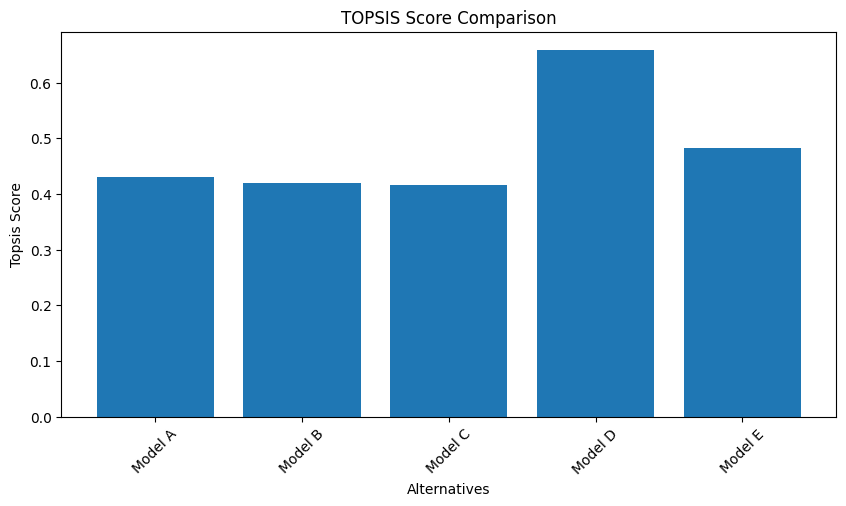

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(result_df["Model"], result_df["Topsis Score"])
plt.xticks(rotation=45)
plt.xlabel("Alternatives")
plt.ylabel("Topsis Score")
plt.title("TOPSIS Score Comparison")
plt.show()